# Investigate a Dataset - [Wine Quality dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Wine Quality dataset

>This data set contains information about two categories of wine, red and white wine. 


### Question(s) for Analysis
>Is certain type of wine associated with higher quality?

>Do wines with higher alcoholic content receive better ratings?

>Do sweeter wines receive higher ratings?

>What level of acidity receives the highest average rating?

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#loading the red wine dataset
red_df = pd.read_csv('winequality-red.csv', delimiter=';')
red_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
#loading the white wine dataset
white_df = pd.read_csv('winequality-white.csv', delimiter=';')
white_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have to investigate the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype.
###  The Cleaning Process:

>I dropped the null values

>I removed the duplicated rows

In [5]:
red_df.isnull().sum().sum()

0

In [6]:
red_df.duplicated().sum()

240

In [7]:
red_df.drop_duplicates(inplace= True)

In [8]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
white_df.isnull().sum().sum()

0

In [10]:
white_df.duplicated().sum()

937

In [11]:
white_df.drop_duplicates(inplace=True)

## Adding important columns for ths analysis

In [12]:
red_col = np.repeat('red', red_df.shape[0])

In [13]:
red_col

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U3')

In [14]:
red_df['color'] = red_col

In [15]:
red_df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
white_col = np.repeat('white', white_df.shape[0])

In [17]:
white_col

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [18]:
white_df['color'] = white_col

In [19]:
white_df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


## Appending the two datasets for better insights

In [20]:
wine = red_df.append(white_df)


In [21]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


In [23]:
wine.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace=True)

In [24]:
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


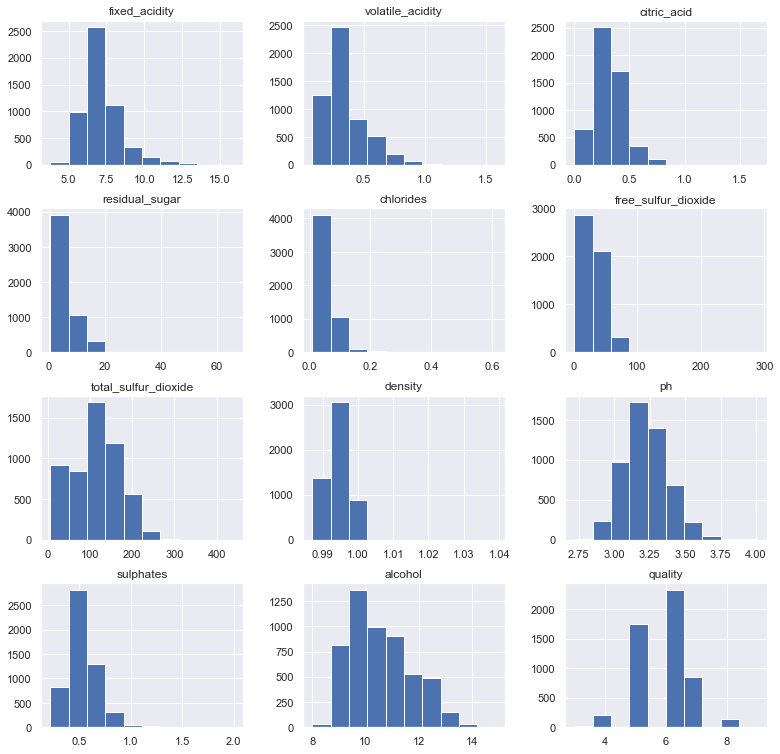

In [25]:
wine.hist(figsize=(13,13));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


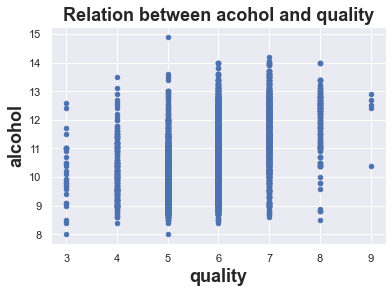

In [26]:
wine.plot(x= 'quality',y= 'alcohol', kind = 'scatter')
plt.title('Relation between acohol and quality', fontsize = 18, weight = 'bold')
plt.xlabel('quality', fontsize = 18, weight = 'bold')
plt.ylabel('alcohol', fontsize = 18, weight = 'bold')
plt.show()

## Exploratory Data Analysis
>After cleaning our dataset Now we shall analyze it looking at the different characteristics and it's relation with quality.

## Is certain type of wine associated with higher quality?

In [27]:
white = wine.query('color == "white"')
red = wine.query('color == "red"')

In [28]:
quality_red = red['quality'].mean()
quality_white = white['quality'].mean()

In [29]:
quality_red

5.6232523914643116

In [30]:
quality_white

5.854834637717748

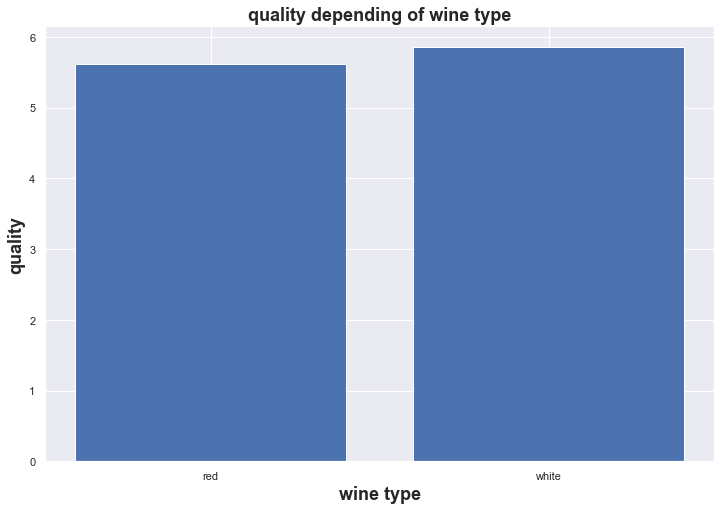

In [31]:
plt.figure(figsize=(12,8))
plt.bar(['red', 'white'], [quality_red, quality_white])
plt.title('quality depending of wine type', fontsize = 18, weight = 'bold')
plt.xlabel('wine type', fontsize = 18, weight = 'bold')
plt.ylabel('quality', fontsize = 18, weight = 'bold')
plt.show()

>> The white wine seems to have an edge over the red wine depending on the analysis.

In [32]:
wine.groupby(['quality', 'color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.139869          0.382157     0.305229        4.499346   
5       red         8.171231          0.578596     0.244523        2.509532   
        white       6.921745          0.303306     0.335957        6.941532   
6       red         8.337383          0.496084     0.279364        2.457290   
        white       6.819435          0.261630     0.338227        5.959787   
7       red         8.858683          0.403653     0.371856        2.716766   
        white       6.701089          0.265363     0.327358        4.523875   
8       red         8.441176          0.427647     0.382941        2.576471   
        white       6.609924          0.286794     0.335038        5.056489   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050059            23.127451            124.127451  0.994199   
5       red     0.093971            17.161179             57.406412  0.997082   
        white   0.052323            36.002979            150.099574  0.995072   
6       red     0.085075            15.637383             40.816822  0.996565   
        white   0.045178            35.308166            136.460850  0.993722   
7       red     0.076832            13.994012             35.449102  0.996051   
        white   0.037556            33.851234            122.052975  0.992059   
8       red     0.068353            13.764706             34.470588  0.995095   
        white   0.036756            35.618321            122.034351  0.991745   
9       white   0.027400            33.400000            116.000000  0.991460   

                     ph  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.185425   0.476667  10.197712  
5       red    3.300815   0.623570   9.888562  
        white  3.171779   0.482621   9.864182  
6       red    3.318000   0.674542  10.658879  
        white  3.196029   0.492355  10.646122  
7       red    3.290060   0.742635  11.491118  
        white  3.228462   0.502859  11.515844  
8       red    3.274118   0.774706  12.158824  
        white  3.235115   0.485878  11.880153  
9       white  3.308000   0.466000  12.180000

### We need to add another column to be able to analyze the data depending on the aciditiy level as it is a main characteristic.

In [33]:
wine['ph'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: ph, dtype: float64

In [34]:
bins = [2.72,3.11,3.21,3.33,4.01]
label = ['high', 'mod_high', 'med', 'low']

In [35]:
wine['acidity_levels'] = pd.cut(wine['ph'], bins, labels=label)

In [36]:
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [37]:
wine.groupby(['acidity_levels', 'color']).mean()

fixed_acidity  volatile_acidity  citric_acid  \
acidity_levels color                                                 
high           red        10.571200          0.485480     0.478960   
               white       7.281509          0.282019     0.364801   
mod_high       red         9.530932          0.483496     0.375000   
               white       6.909461          0.283560     0.335402   
med            red         8.516587          0.506767     0.301659   
               white       6.554410          0.283800     0.319190   
low            red         7.182990          0.573806     0.165361   
               white       6.349854          0.268533     0.300628   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
acidity_levels color                                                   
high           red          2.548400   0.128904            15.128000   
               white        6.873632   0.049148            34.600746   
mod_high       red          2.694703   0.095682            14.995763   
               white        6.178108   0.046659            36.640311   
med            red          2.573918   0.085548            15.823317   
               white        5.117436   0.043564            33.732821   
low            red          2.412457   0.078141            16.471649   
               white        4.929270   0.042342            34.231387   

                      total_sulfur_dioxide   density        ph  sulphates  \
acidity_levels color                                                        
high           red               51.560000  0.997878  3.037280   0.797680   
               white            135.880182  0.994095  3.030896   0.479635   
mod_high       red               48.726695  0.997382  3.169492   0.665890   
               white            141.923218  0.993928  3.163830   0.477450   
med            red               50.187500  0.996804  3.277572   0.651010   
               white            133.984103  0.993258  3.267590   0.497867   
low            red               42.635739  0.996117  3.448230   0.631443   
               white            136.478102  0.993780  3.433723   0.519212   

                        alcohol   quality  
acidity_levels color                       
high           red    10.132267  5.640000  
               white  10.455127  5.737148  
mod_high       red    10.261723  5.686441  
               white  10.476386  5.784278  
med            red    10.402564  5.668269  
               white  10.798937  5.931282  
low            red    10.587199  5.561856  
               white  10.709100  6.065693

## Do wines with higher alcoholic content receive better ratings?

In [38]:
median = wine['alcohol'].median()

In [39]:
median

10.4

In [40]:
low_alc = wine.query('alcohol < 10.4')
high_alc = wine.query('alcohol >= 10.4')

In [41]:
quality_low_alc = low_alc['quality'].mean()
quality_high_alc = high_alc['quality'].mean()

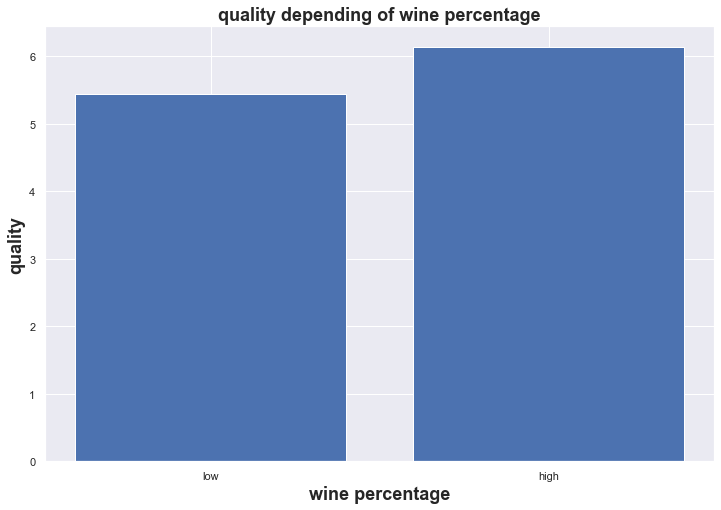

In [42]:
plt.figure(figsize=(12,8))
plt.bar(['low', 'high'], [quality_low_alc, quality_high_alc])
plt.title('quality depending of wine percentage', fontsize = 18, weight = 'bold')
plt.xlabel('wine percentage', fontsize = 18, weight = 'bold')
plt.ylabel('quality', fontsize = 18, weight = 'bold')
plt.show()

>> The higher the alcohol percentage the higher the quality.

## Do sweeter wines receive better ratings?

In [43]:
median = wine['residual_sugar'].median()
median

2.7

In [44]:
low_sug = wine.query('residual_sugar < 2.7')
high_sug = wine.query('residual_sugar >= 2.7')

In [45]:
quality_low_sug = low_sug['quality'].mean()
quality_high_sug = high_sug['quality'].mean()

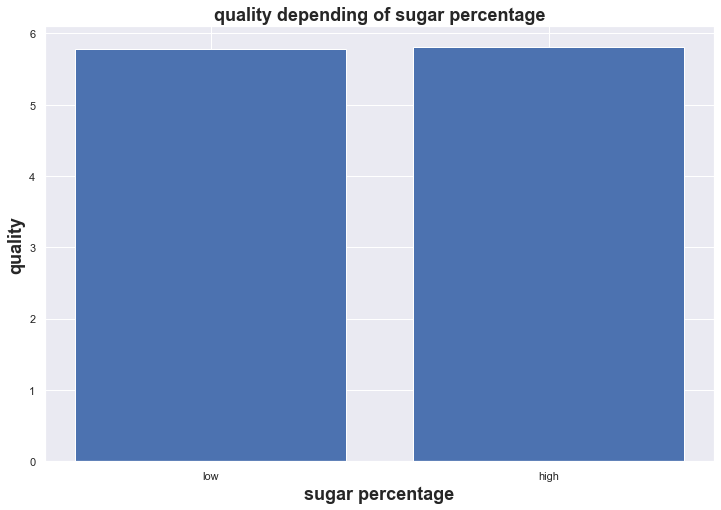

In [46]:
plt.figure(figsize=(12,8))
plt.bar(['low', 'high'], [quality_low_sug, quality_high_sug])
plt.title('quality depending of sugar percentage', fontsize = 18, weight = 'bold')
plt.xlabel('sugar percentage', fontsize = 18, weight = 'bold')
plt.ylabel('quality', fontsize = 18, weight = 'bold')
plt.show()

>> There is no significant difference in quality depending on the sugar percentange.

## What level of acidity receives the highest average rating?

In [47]:
y = wine.groupby('acidity_levels').quality.mean()
y

acidity_levels
high        5.728024
mod_high    5.766917
med         5.852624
low         5.834254
Name: quality, dtype: float64

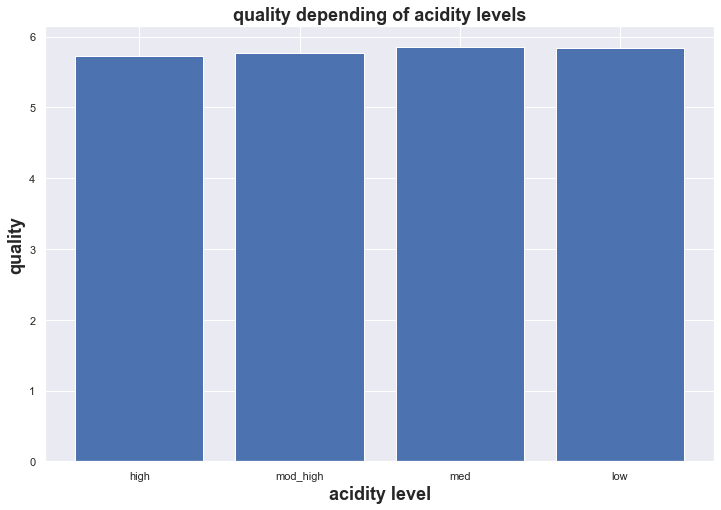

In [48]:
plt.figure(figsize=(12,8))
plt.bar([1,2,3,4], y, tick_label = y.index)
plt.title('quality depending of acidity levels', fontsize = 18, weight = 'bold')
plt.xlabel('acidity level', fontsize = 18, weight = 'bold')
plt.ylabel('quality', fontsize = 18, weight = 'bold')
plt.show();

>> Low and medium acidity levels have higher quality than the high and mod_high acidity levels.

## Conclusions
### We concluded that:
> The white wine seems to have an edge over the red wine.

> The higher the alcohol percentage the higher the quality.

> There is no significant difference in quality depending on the sugar percentange.

> Low and medium acidity levels have higher quality than the high and mod_high acidity levels.
